In [1]:


import numpy as np 
import pandas as pd 


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization

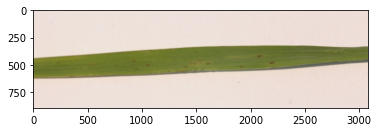

In [3]:
imre = plt.imread("data/Leaf smut/DSC_0336.jpg")
img = plt.imshow(imre)

In [4]:
imre.shape

(897, 3081, 3)

In [5]:
label = []
image = []
image_width = 500
image_height = 500

import os
for i in os.listdir("data"):
        for j in  os.listdir("data/"+i):
            img = cv2.imread("data/"+i+"/"+j)
            img = cv2.resize(img,(image_width,image_height))
            label.append(i)
            image.append(img)
                
x = np.array(image)
y = np.array(label)

x.shape , y.shape

((120, 500, 500, 3), (120,))

In [6]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [7]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [8]:

x_train = x_train/255
x_test = x_test/255

In [9]:

data_agu = keras.Sequential([
            keras.layers.experimental.preprocessing.RandomFlip(),
            keras.layers.experimental.preprocessing.RandomRotation(0.4),
            keras.layers.experimental.preprocessing.RandomContrast(0.4)
            ])

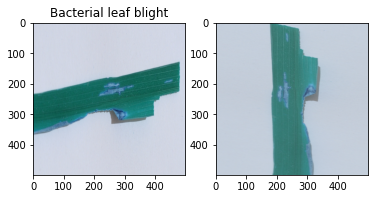

In [10]:
from sklearn.metrics import accuracy_score
from lib.utils import *
ac=[]
plt.subplot(1,2,1)
plt.imshow(x[0])
plt.title(label[0])


plt.subplot(1,2,2)
plt.imshow(data_agu(x)[0])

In [11]:
model_cnn = Sequential([
    data_agu,
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(3)
])

In [12]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

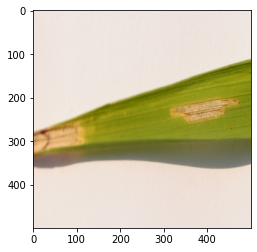

Pridicted Label  0
['Bacterial leaf blight']


In [15]:
from skimage import io

urls = ["data/Bacterial leaf blight/DSC_0373.JPG"   
       ]

for i in urls:
    import matplotlib.pyplot as plt
    try_image = io.imread(i)
    try_image = cv2.resize(try_image,(image_width,image_height))
    try_image = try_image/255
    plt.imshow(try_image)
    plt.show()
    try_image = try_image.reshape(1,image_width,image_height,3)

    
    if len(try_image.shape) > 2 and try_image.shape[2] == 4:
        q = cv2.cvtColor(try_image, cv2.COLOR_BGRA2BGR)
        pridiction = np.argmax(model.predict([q]))

    else:
        pridiction = np.argmax(model.predict([try_image]))

    print("Pridicted Label ",pridiction)
    print(encode.inverse_transform([pridiction]))